# Lab 3: Pandas

(Last update: 07/12/2023)

Full name: Đoàn Ngọc Mai  
Student ID: 21127104

---

**Tóm tắt**: In this assignment, you are going to learn how to use `Pandas`. Loops, and methods such as `apply/applymap` are not allowed to use unless specifically instructed to do so.

## 0. General instructions

### 0.0. Work on assignment

- You will do your assignment directly on this notebook file. First, you fill your name and student code at the beginning of the file. In this file, you will write your code when you see the following lines of code:
    ```python
    # TODO
    raise NotImplementedError()
    ```

    For optional coding parts, there will be:

    ```python
    # TODO (OPTIONAL)
    ```

    For markdown cell, there will be:

    ```markdown
    **TODO**: ...
    ```

- Of course, you have to remove the `raise NotImplementedError()` statement when you finish.

- For coding parts, there are often cells below to help you check your answers. You will pass the test if there are no errors when you run the test cells. In some cases, the tests are insufficient. That means if you do not pass the test, your answer is definitely wrong somewhere, but if you pass the test, your answer may still be incorrect.

- While doing the assignment, you should print out the output and create more cells for testing. But you have to remove all of them (comment your print-out codes, delete the cell created by you) when you submit your code. <font color=red>Do not remove or edit my cells</font> (except for the aforementioned cells).

- Keep your code clean and clear by using meaningful variable names and comments, not write too-long coding lines. Press `Ctrl + S` right after editing.

- **Keep it real**: The reason why you are here is to <font color=green>study, really study</font>. I highly recommend that you discuss your idea with your friends and <font color=green>write your own code based on your own knowledge</font>. <font color=red>Copy means zero.</font>

### 0.1. Submit your assignment

- When grading your assignment, I will choose `Kernel` - `Restart & Run All` in order to restart the kernel and run all cells in your notebook. Therefore, you should do that before submitting to ensure that the outputs are all as expected.

- After that, rename the notebook as `<Student ID>.ipynb`. For example, if your student code is 1234567, then your notebook is `1234567.ipynb`.

- Finally, submit your notebook file on Moodle. <font color=red>Please strictly follow the submission rules.</font>

---

## 1. Import libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import warnings
warnings.simplefilter('ignore')

# TODO (OPTION): import your libraries
from sklearn.preprocessing import MultiLabelBinarizer

## 2. Data collection

- I have done that for you. In this assignment, you are going to analyze a dataset collected from **A survey on facial cleanser consumption behavior of 18-25 year olds in HCM City**. You are provided the following files:
    - `./survey.csv`: Survey results of more than 300 people taking part in the survey on GoogleForm. You will mainly work on this file.
    - `./survey.xlsx`: The content is similar to `./survey.csv` but you can open it in Excel to have a better view.
    - `./form.pdf`: Questionnaire survey.

- Read `./form.pdf` and summarize the survey by indicating **sections** in the form as well as **possible scenarios** when conducting the survey.

    **TODO**: 
    The survey form, titled `Consumer Behavior Study for Facial Cleanser Products Among Customers Aged 18-25 in Ho Chi Minh City` is structured into various sections to gather comprehensive data:

    1. **Introduction**: Introduces the purpose and context of the survey.
    2. **Demographics and Screening Questions**: Includes age, residence, and prior use of facial cleansers.
    3. **Behavioral Questions**: Inquires about reasons for not using facial cleansers, types of products used, usage habits, and purchase locations.
    4. **Product Preferences**: Explores preferences regarding scent, ingredients, and form (gel, foam, etc.).
    5. **Shopping Habits**: Focuses on online and offline shopping preferences and influential factors in purchase decisions.
    6. **Concerns and Influences**: Addresses concerns about product use and the impact of various factors on purchasing decisions.
    7. **Future Preferences**: Gauges interest in trying new products and desired features in new products.
    8. **Referral Source**: Asks respondents how they received the survey.

- Data source: Võ Thị Minh Trà, University of Economics Ho Chi Minh City.

## 3. Data pre-processing and exploration

- In this section, you are going to explore features of data. First, you have to read the data from `./survey.csv` and store it into a dataframe called `survey_df`.

In [2]:
# TODO: read data from ./survey.csv and save to survey_df then display 5 first lines of data
survey_df = pd.read_csv('./data/survey.csv')
survey_df.head(5)

,Dấu thời gian,Bạn bao nhiêu tuổi?,Hiện tại bạn đang cư trú ở đâu?,Bạn đã sử dụng sữa rửa mặt bao giờ chưa?,Nguyên nhân bạn chưa sử dụng sữa rửa mặt là gì?,Giới tính của bạn là?,1. Bạn sử dụng sữa rửa mặt với mục đích gì?,2. Da của bạn thuộc loại da gì?,3. Bạn thường sử dụng sữa rửa mặt bao nhiêu lần một ngày?,4. Bạn sử dụng sữa rửa mặt khi nào?,...,20. Bạn lo ngại điều gì khi sử dụng sữa rửa mặt?,"21. Đánh giá MỨC ĐỘ ẢNH HƯỞNG của các yếu tố sau đến quyết định mua hàng của bạn\nb, 2: Không ảnh hưởng, 3: Hơi không ảnh hưởng, 4: Bình thường, 5: Hơi ảnh hưởng, 6: Ảnh hưởng, 7: Rất ảnh hưởng [Chất lượng]","21. Đánh giá MỨC ĐỘ ẢNH HƯỞNG của các yếu tố sau đến quyết định mua hàng của bạn\nThang đo: 1: Rất không ảnh hưởng, 2: Không ảnh hưởng, 3: Hơi không ảnh hưởng, 4: Bình thường, 5: Hơi ảnh hưởng, 6: Ảnh hưởng, 7: Rất ảnh hưởng [Thương hiệu]","21. Đánh giá MỨC ĐỘ ẢNH HƯỞNG của các yếu tố sau đến quyết định mua hàng của bạn\nThang đo: 1: Rất không ảnh hưởng, 2: Không ảnh hưởng, 3: Hơi không ảnh hưởng, 4: Bình thường, 5: Hơi ảnh hưởng, 6: Ảnh hưởng, 7: Rất ảnh hưởng [Giá cả]","21. Đánh giá MỨC ĐỘ ẢNH HƯỞNG của các yếu tố sau đến quyết định mua hàng của bạn\nThang đo: 1: Rất không ảnh hưởng, 2: Không ảnh hưởng, 3: Hơi không ảnh hưởng, 4: Bình thường, 5: Hơi ảnh hưởng, 6: Ảnh hưởng, 7: Rất ảnh hưởng [Mẫu mã]","21. Đánh giá MỨC ĐỘ ẢNH HƯỞNG của các yếu tố sau đến quyết định mua hàng của bạn\nThang đo: 1: Rất không ảnh hưởng, 2: Không ảnh hưởng, 3: Hơi không ảnh hưởng, 4: Bình thường, 5: Hơi ảnh hưởng, 6: Ảnh hưởng, 7: Rất ảnh hưởng [Xuất xứ]","21. Đánh giá MỨC ĐỘ ẢNH HƯỞNG của các yếu tố sau đến quyết định mua hàng của bạn\nThang đo: 1: Rất không ảnh hưởng, 2: Không ảnh hưởng, 3: Hơi không ảnh hưởng, 4: Bình thường, 5: Hơi ảnh hưởng, 6: Ảnh hưởng, 7: Rất ảnh hưởng [Thành phần]","21. Đánh giá MỨC ĐỘ ẢNH HƯỞNG của các yếu tố sau đến quyết định mua hàng của bạn\nThang đo: 1: Rất không ảnh hưởng, 2: Không ảnh hưởng, 3: Hơi không ảnh hưởng, 4: Bình thường, 5: Hơi ảnh hưởng, 6: Ảnh hưởng, 7: Rất ảnh hưởng [Mùi hương]","22. Nếu chúng tôi ra mắt một sản phẩm sữa rửa mặt mới, bạn có sẵn sàng dùng thử hay không?",23. Bạn mong muốn điều gì nhất ở một sản phẩm sữa rửa mặt mới?
0,04/02/2023 20:10:08,Từ 18 - 25 tuổi,TP.HCM,Đã từng,NaN,Nam,"Loại bỏ bụi bẩn; dầu thừa; tế bào chết;..., Gi...",Da hỗn hợp,Ít hơn 1 lần/ngày,Trước khi đi ngủ,...,"Hàng giả; hàng nhái, Sản phẩm không có nguồn g...",7.0,5.0,7.0,5.0,5.0,3.0,6.0,Có,Sản phẩm được tích hợp nhiều công dụng
1,04/02/2023 20:11:52,Từ 18 - 25 tuổi,TP.HCM,Đã từng,NaN,Nữ,"Hỗ trợ làm trắng da, Loại bỏ bụi bẩn; dầu thừa...",Da dầu,1 lần/ngày,Trước khi đi ngủ,...,"Hàng giả; hàng nhái, Tác dụng phụ; gây kích ứn...",7.0,6.0,2.0,2.0,2.0,7.0,4.0,Có,Sản phẩm chuyên sâu với hiệu quả cao
2,04/02/2023 20:12:49,Từ 18 - 25 tuổi,TP.HCM,Đã từng,NaN,Nữ,"Loại bỏ bụi bẩn; dầu thừa; tế bào chết;..., Gi...",Da dầu,2 lần/ngày,"Sau khi thức dậy, Trước khi đi ngủ",...,"Sản phẩm không có nguồn gốc rõ ràng, Tác dụng ...",4.0,4.0,4.0,4.0,4.0,4.0,4.0,Chưa biết,Sản phẩm chuyên sâu với hiệu quả cao
3,04/02/2023 20:20:42,Từ 18 - 25 tuổi,TP.HCM,Đã từng,NaN,Nam,Loại bỏ bụi bẩn; dầu thừa; tế bào chết;...,Da dầu,2 lần/ngày,"Sau khi thức dậy, Trước khi đi ngủ",...,"Hàng giả; hàng nhái, Sản phẩm không có nguồn g...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,Có,Sản phẩm lành tính với nhiều loại da
4,04/02/2023 20:23:34,Từ 18 - 25 tuổi,TP.HCM,Đã từng,NaN,Nữ,"Cấp ẩm; cân bằng độ pH, Loại bỏ bụi bẩn; dầu t...",Da dầu,2 lần/ngày,"Sau khi thức dậy, Trước khi đi ngủ",...,"Hàng giả; hàng nhái, Sản phẩm không có nguồn g...",6.0,5.0,6.0,5.0,6.0,7.0,5.0,Chưa biết,Sản phẩm lành tính với nhiều loại da


### 3.0. How many rows/columns are there in the dataset?

- Save the number of rows and columns to `n_rows, n_cols`

In [3]:
# TODO: save your answer to n_rows, n_cols

n_rows, n_cols = survey_df.shape

In [4]:
# TEST
assert (n_rows, n_cols) == (337, 38)

### 3.1. Explore rows

- Each row is a result, which is done by the person taking part in the survey. These people conducted the survey on GoogleForm. The results are then saved to a sheet and converted to `*.csv` and `*.xlsx`

- Is there any duplicate row? You will check it using `Pandas`.

In [5]:
# TODO: save your answer to is_duplicate
is_duplicate = survey_df.duplicated().any()

In [6]:
# TEST
assert is_duplicate == False

### 3.2. Explore columns

- Observe the data provided, carefully read the column titles as well as the data contained in the columns, and compare them with the survey questionnaire to gain knowledge about the data.
- Since the column titles are too long, we have to re-name them in order to work on them easily.

In [7]:
# TODO: rename the columns. new names = ["Thời_gian", "Tuổi", "Địa_chỉ", "Đã_dùng_srm?", "Lý_do_chưa_sd", "Giới_tính", "1_Mục_đích_sd_srm", "2_Loại_da", "3_Tuần_suất_1ngày", "4_Sd_khi_nào", "5_Mua_ở_đâu", "6_Quảng_cáo_ở_đâu", "7_Chiết_xuất", "8_Srm_đang_sd", "9_Srm_có_mùi_hương?", "91_Thích_hương_trái_cây?", "92_Thích_hương_rau_củ?", "93_Thích_hương_hoa_cỏ?", "10_Dung_tích", "11_Số_lượng_mua", "12_Chi_tiền_cho_150ml", "13_Tiêu_chí_chọn_srm", "14_Ai_tư_vấn", "15_Xuất_xứ", "16_Mua_online_ở_đâu", "17_Mua_offline_ở_đâu", "18_Tiêu_chí_mua_offline", "19_Tiêu_chí_mua_online", "20_Lo_ngại_về_srm", "21_Mức_ảnh_hưởng_của_chất_lượng", "21_Mức_ảnh_hưởng_của_thương_hiệu", "21_Mức_ảnh_hưởng_của_giá_cả", "21_Mức_ảnh_hưởng_của_mẫu_mã", "21_Mức_ảnh_hưởng_của_xuất_xứ", "21_Mức_ảnh_hưởng_của_thành_phần", "21_Mức_ảnh_hưởng_của_mùi_hương", "22_Dùng_thử?", "23_Kỳ_vọng"]
new_names = ["Thời_gian", "Tuổi", "Địa_chỉ", "Đã_dùng_srm?", "Lý_do_chưa_sd", 
             "Giới_tính", "1_Mục_đích_sd_srm", "2_Loại_da", "3_Tuần_suất_1ngày", 
             "4_Sd_khi_nào", "5_Mua_ở_đâu", "6_Quảng_cáo_ở_đâu", "7_Chiết_xuất", 
             "8_Srm_đang_sd", "9_Srm_có_mùi_hương?", "91_Thích_hương_trái_cây?", 
             "92_Thích_hương_rau_củ?", "93_Thích_hương_hoa_cỏ?", "10_Dung_tích", 
             "11_Số_lượng_mua", "12_Chi_tiền_cho_150ml", "13_Tiêu_chí_chọn_srm", 
             "14_Ai_tư_vấn", "15_Xuất_xứ", "16_Mua_online_ở_đâu", "17_Mua_offline_ở_đâu", 
             "18_Tiêu_chí_mua_offline", "19_Tiêu_chí_mua_online", "20_Lo_ngại_về_srm", 
             "21_Mức_ảnh_hưởng_của_chất_lượng", "21_Mức_ảnh_hưởng_của_thương_hiệu", 
             "21_Mức_ảnh_hưởng_của_giá_cả", "21_Mức_ảnh_hưởng_của_mẫu_mã", 
             "21_Mức_ảnh_hưởng_của_xuất_xứ", "21_Mức_ảnh_hưởng_của_thành_phần", 
             "21_Mức_ảnh_hưởng_của_mùi_hương", "22_Dùng_thử?", "23_Kỳ_vọng"]
survey_df.columns = new_names

In [8]:
# TEST
assert (survey_df.columns == ["Thời_gian", "Tuổi", "Địa_chỉ", "Đã_dùng_srm?", "Lý_do_chưa_sd", "Giới_tính", "1_Mục_đích_sd_srm", "2_Loại_da", "3_Tuần_suất_1ngày", "4_Sd_khi_nào", "5_Mua_ở_đâu", "6_Quảng_cáo_ở_đâu", "7_Chiết_xuất", "8_Srm_đang_sd", "9_Srm_có_mùi_hương?", "91_Thích_hương_trái_cây?", "92_Thích_hương_rau_củ?", "93_Thích_hương_hoa_cỏ?", "10_Dung_tích", "11_Số_lượng_mua", "12_Chi_tiền_cho_150ml", "13_Tiêu_chí_chọn_srm", "14_Ai_tư_vấn", "15_Xuất_xứ", "16_Mua_online_ở_đâu", "17_Mua_offline_ở_đâu", "18_Tiêu_chí_mua_offline", "19_Tiêu_chí_mua_online", "20_Lo_ngại_về_srm", "21_Mức_ảnh_hưởng_của_chất_lượng", "21_Mức_ảnh_hưởng_của_thương_hiệu", "21_Mức_ảnh_hưởng_của_giá_cả", "21_Mức_ảnh_hưởng_của_mẫu_mã", "21_Mức_ảnh_hưởng_của_xuất_xứ", "21_Mức_ảnh_hưởng_của_thành_phần", "21_Mức_ảnh_hưởng_của_mùi_hương", "22_Dùng_thử?", "23_Kỳ_vọng"]).all()

### 3.3. Remove meaningless rows and columns

- Once again, this is **A survey on facial cleanser consumption behavior of 18-25 year olds in HCM City**. That means those people who do not live in HCM City or those whose age is not in the range of [18-25] will be removed.
- After removing these people, column `Tuổi` and `Địa_chỉ` become meaningless since they contain the same data. Therefore, we also remove these columns.

In [9]:
# TODO: remove those whose age is not within the range [18-25] and whose address is not HCM City
# TODO: then, remove 2 corresponding columns
survey_df = survey_df[(survey_df['Tuổi'] == 'Từ 18 - 25 tuổi') & (survey_df['Địa_chỉ'] == 'TP.HCM')]
survey_df = survey_df.drop(columns=['Tuổi', 'Địa_chỉ'])

In [10]:
# TEST
assert survey_df.shape == (309, 36)
assert set(['Tuổi', 'Địa_chỉ']).intersection(set(survey_df.columns)) == set()

- The survey participants must be those who use facial cleanser. That means those who have not used cleanser are meaningless to the survey. You have to remove these people from the data.

- After removing these people, column `Đã_dùng_srm` and column `Lý_do_chưa_sd` become meaningless since thay contain the same data. Therefore, we also remove these columns.

In [11]:
# TODO: remove those who have not used facial cleanser
# TODO: then, remove 2 corresponding columns
survey_df = survey_df[survey_df['Đã_dùng_srm?'] == 'Đã từng']
survey_df = survey_df.drop(columns=['Đã_dùng_srm?','Lý_do_chưa_sd'])

In [12]:
# TEST
assert survey_df.shape == (305, 34)
assert set(['Đã_dùng_srm?', 'Lý_do_chưa_sd']).intersection(set(survey_df.columns)) == set()

### 3.4. Handle missing data & Convert data

- Next, we start handling missing data. Run function `info()` so you can overview your data.

In [13]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, 0 to 335
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Thời_gian                         305 non-null    object 
 1   Giới_tính                         305 non-null    object 
 2   1_Mục_đích_sd_srm                 305 non-null    object 
 3   2_Loại_da                         305 non-null    object 
 4   3_Tuần_suất_1ngày                 305 non-null    object 
 5   4_Sd_khi_nào                      305 non-null    object 
 6   5_Mua_ở_đâu                       305 non-null    object 
 7   6_Quảng_cáo_ở_đâu                 305 non-null    object 
 8   7_Chiết_xuất                      305 non-null    object 
 9   8_Srm_đang_sd                     305 non-null    object 
 10  9_Srm_có_mùi_hương?               305 non-null    object 
 11  91_Thích_hương_trái_cây?          166 non-null    object 
 12  92_Thích_hươn

- You can see that, most of the columns do not have missing data except columns `91_Thích_hương_trái_cây?`, `92_Thích_hương_rau_củ?` and `93_Thích_hương_hoa_cỏ?`. They are missing nearly 50% number of rows.

- State the reason. Then, conclude whether we should handle missing data. If you decided to handle missing data, how would you do that?

    **TODO**: 
    - The reason:
        - The survey form includes a section where respondents are asked if they like scented facial cleansers (Question 15: "Bạn có thích sữa rửa mặt có mùi hương không?"). If the respondent answers "Yes" (Có), they are then directed to further questions about their scent preferences, including preferences for fruit scents (9.1), vegetable scents (9.2), and floral/grassy scents (9.3). Those who answer "No" (Không) skip these questions and move to a later section.
        - This design explains why there is significant missing data in the columns `91_Thích_hương_trái_cây?`, `92_Thích_hương_rau_củ?`, and `93_Thích_hương_hoa_cỏ?`. These columns are only applicable to respondents who indicated a preference for scented cleansers.
    - Given this context, deciding whether to handle the missing data depends on the objectives of the analysis:

        - **If the analysis focuses on scent preferences among those who do care about scents**, these missing values are not an issue as they represent a lack of interest in scents from the rest of the respondents. In this case, the analysis can proceed with the available data, acknowledging the conditional nature of these questions.

        - **If the objective is to understand the overall population's preferences, including their scent preferences**, then addressing the missing data is essential. There are several ways to handle missing data:

        - **Imputation**: If it's reasonable to assume a default preference (like 'No preference' or 'Neutral' towards scents), these can be imputed in the missing entries.
        
        - **Exclusion**: If the missing data is not crucial for the primary analysis objectives, these columns can be excluded from analyses where they are not relevant.

        - **Segmentation**: Analyze the data in segments – one for respondents who answered these scent preference questions and another for those who did not. This approach acknowledges the difference in the respondent groups.

- Observe the result returned by `info()`, you are able to gain some information about columns. From there, you will convert:
    - `Thời_gian`: `Datetime`
    - Columns `21_*` (columns which start with `21_`): `Int`. The reason is that these columns contain number from 1 (`Rất không ảnh hưởng`) to 7 (`Rất ảnh hưởng`). You can use `for` loop here in order to loop through the columns and convert them.

- State the reason why the data type of columns `21_*` is `np.float64` instead of `np.int64` (before conversion).

    **TODO**: The data type of columns `21_*` in the survey data being `np.float64` instead of `np.int64` is  because these columns contain numerical responses that include decimal values. In surveys, especially those involving rating scales or degrees of preference, respondents often have the option to give fractional or decimal responses, not just whole numbers. This flexibility allows for more nuanced feedback. As a result, the data type `np.float64` is used to accommodate these potential decimal values. In contrast, `np.int64` would be suitable only for integer values without any decimal component.

In [14]:
# TODO: convert column `Thời_gian` to datetime and columns `21_*` to int
survey_df['Thời_gian'] = pd.to_datetime(survey_df['Thời_gian'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
col_21 = [col for col in survey_df.columns if col.startswith('21_')]
for col in col_21:
    survey_df[col] = survey_df[col].astype(np.int64)

In [15]:
# TEST
assert survey_df['Thời_gian'].dt.day.max() == 12
assert (survey_df.dtypes[1:] == [object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, np.int64, np.int64, np.int64, np.int64, np.int64, np.int64, np.int64, object, object]).all()

### 3.5. Data distribution in columns

- In this section, you are going to extract the distribution of data in each column.Specifically, there are 2 types of columns: **Categorical** and **Numeric**. For each type, there are different ways to extract the distribution.
- First, we will work on numeric columns. You will perform 2 steps:
    - Step #1: Determine the quantile values **(min, 25%, 50%, 75%, max)**: Save your answer to `numeric_col_profile`. This variable is a dataframe whose index column is `["min", "25%", "50%", "75%", "max"]` and column names are similar to the name of numeric columns.
    - Step #2: Draw a histogram to visualize the distribution.

In [16]:
# TODO: compute quantile values of numeric columns ("21_*" columns)
numeric_cols = survey_df.select_dtypes(include=[np.number]).columns
numeric_col_profile = survey_df[numeric_cols].describe(percentiles=[.25, .5, .75]).loc[['min', '25%', '50%', '75%', 'max']]
numeric_col_profile

,21_Mức_ảnh_hưởng_của_chất_lượng,21_Mức_ảnh_hưởng_của_thương_hiệu,21_Mức_ảnh_hưởng_của_giá_cả,21_Mức_ảnh_hưởng_của_mẫu_mã,21_Mức_ảnh_hưởng_của_xuất_xứ,21_Mức_ảnh_hưởng_của_thành_phần,21_Mức_ảnh_hưởng_của_mùi_hương
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,5.0,4.0,4.0,3.0,4.0,5.0,3.0
50%,7.0,5.0,5.0,4.0,5.0,6.0,5.0
75%,7.0,6.0,6.0,5.0,6.0,7.0,6.0
max,7.0,7.0,7.0,7.0,7.0,7.0,7.0


In [17]:
# TEST
assert dict(numeric_col_profile['21_Mức_ảnh_hưởng_của_chất_lượng'])  == {'min': 1.0, '25%': 5.0, '50%': 7.0, '75%': 7.0, 'max': 7.0}
assert dict(numeric_col_profile['21_Mức_ảnh_hưởng_của_thương_hiệu'])  == {'min': 1.0, '25%': 4.0, '50%': 5.0, '75%': 6.0, 'max': 7.0}
assert dict(numeric_col_profile['21_Mức_ảnh_hưởng_của_giá_cả'])  == {'min': 1.0, '25%': 4.0, '50%': 5.0, '75%': 6.0, 'max': 7.0}
assert dict(numeric_col_profile['21_Mức_ảnh_hưởng_của_mẫu_mã'])  == {'min': 1.0, '25%': 3.0, '50%': 4.0, '75%': 5.0, 'max': 7.0}
assert dict(numeric_col_profile['21_Mức_ảnh_hưởng_của_xuất_xứ'])  == {'min': 1.0, '25%': 4.0, '50%': 5.0, '75%': 6.0, 'max': 7.0}
assert dict(numeric_col_profile['21_Mức_ảnh_hưởng_của_thành_phần'])  == {'min': 1.0, '25%': 5.0, '50%': 6.0, '75%': 7.0, 'max': 7.0}
assert dict(numeric_col_profile['21_Mức_ảnh_hưởng_của_mùi_hương'])  == {'min': 1.0, '25%': 3.0, '50%': 5.0, '75%': 6.0, 'max': 7.0}

- In step #2, you will draw data distributions in order to understand more about numeric columns. You will draw all distributions in one figure (all charts should share the same y-axis). Note that you have to choose the number of `bins`. Propose a number of `bins` and explain why.

    **TODO**: 
    - Based on the calculations, we have the following bin choices:
        - Sturges' Rule: 9 bins
        - Square-root Choice: 18 bins
        - Rice Rule: 13 bins
    - Considering the skewness of the numeric columns, which ranges from slightly negative to moderately negative, we should choose a bin number that provides a good balance between detail and clarity.
    - Sturges' Rule is generally good for smaller datasets and might oversimplify for larger datasets.
    - Square-root Choice often works well for moderate-sized datasets but might provide too many bins for our purpose, potentially leading to a cluttered visualization.
    Rice Rule offers a middle ground between the two.
    - Given the size of our dataset and the skewness of the data, Rice Rule (13 bins) seems like a reasonable choice. It offers a good balance, providing enough detail without overcomplicating the visualization.

<Figure size 2000x1500 with 0 Axes>

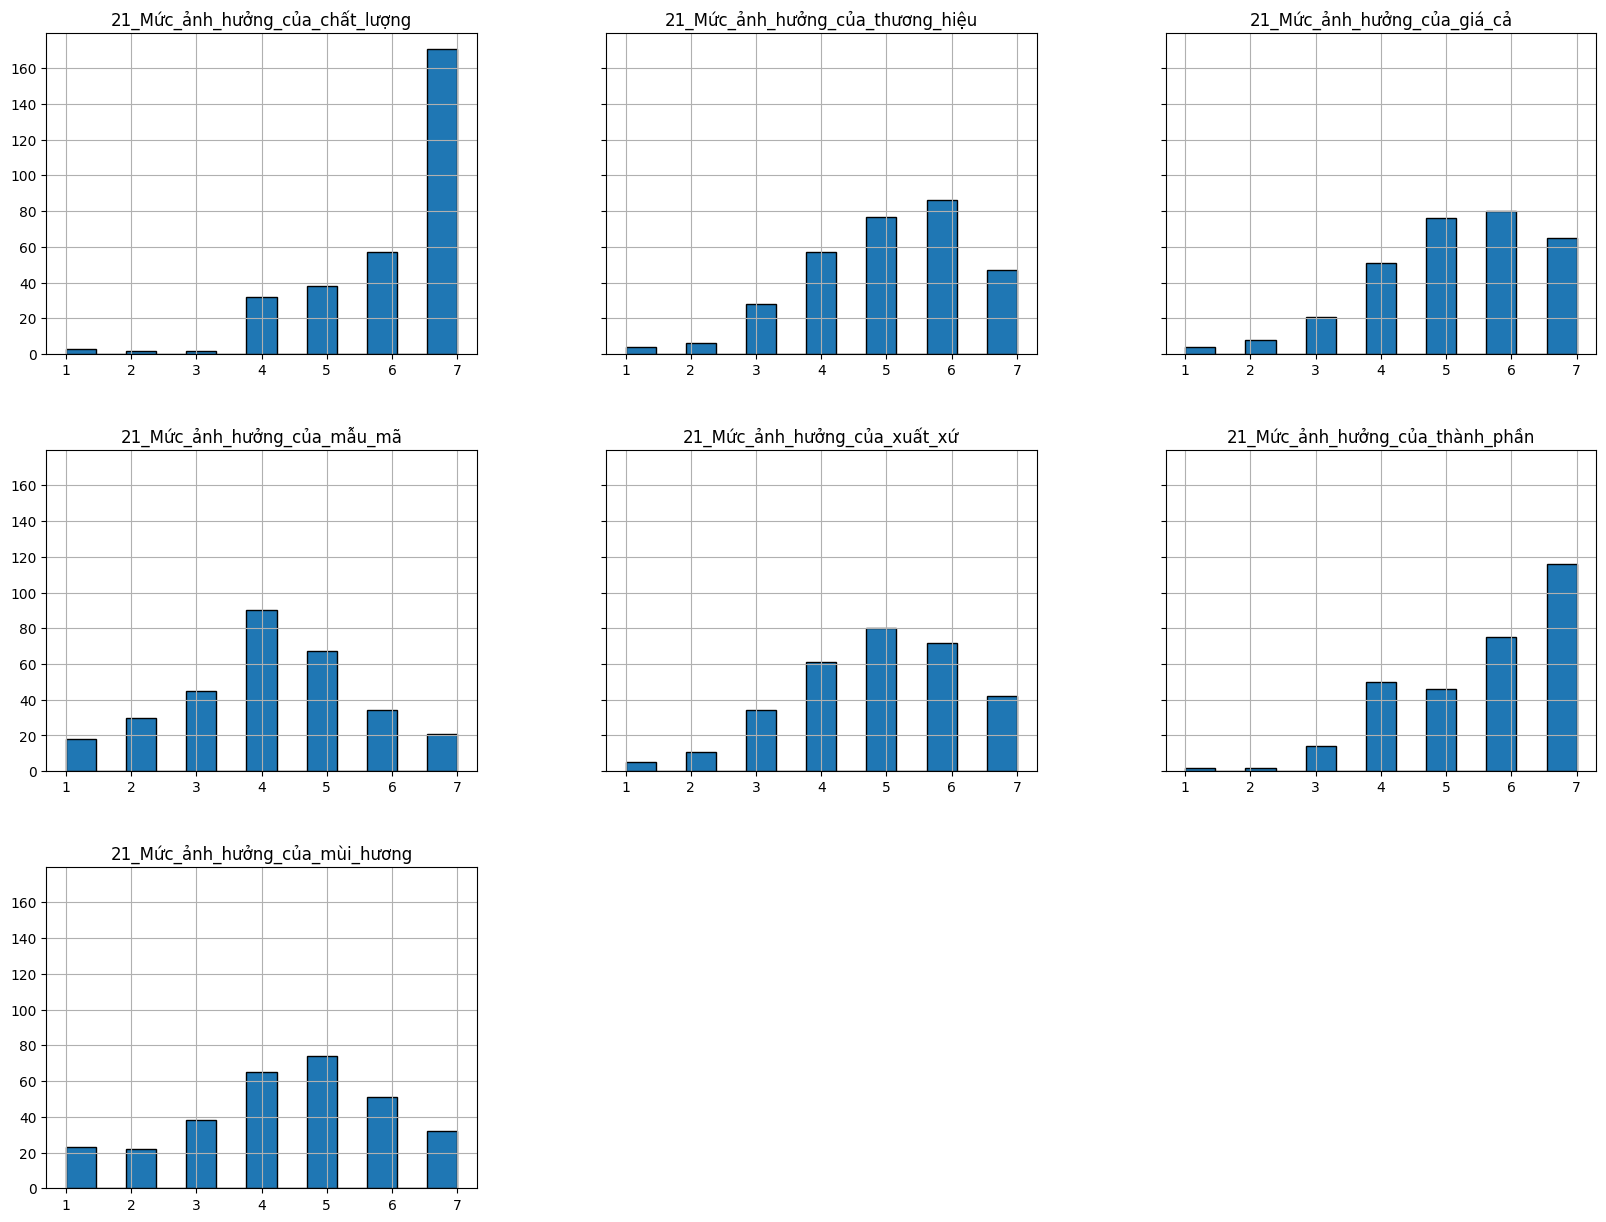

In [18]:
# TODO: draw 7 histogram
plt.figure(figsize=(20, 15))

# Number of bins as per Rice Rule
rice_bins = 13

histograms = survey_df[numeric_cols].hist(bins=rice_bins, edgecolor='black', rwidth=1, figsize=(20, 15), layout=(3, 3), sharey=True, grid=True)

plt.show()

- According to the above distributions, what factors do the survey participants care about when buying facial cleanser? Why?

    **TODO**: 
    - The histograms provided reflect the survey participants' concerns regarding various factors when buying facial cleanser, as indicated by the columns starting with "21_Mức_ảnh_hưởng_của". These factors include the quality of the product, the brand, price, design, origin, ingredients, and scent. Here's how we can interpret the data based on the distribution shown in the histograms:
    1. **Quality (Chất lượng):** The histogram shows a skew towards higher values, indicating that quality is a significant concern for most participants. A product's quality often directly impacts customer satisfaction and is a primary consideration for purchases.
    2. **Brand (Thương hiệu):** The distribution is somewhat even, but with a slight skew towards the higher end. This suggests that while brand recognition is important, it may not be as crucial as quality. 
    3. **Price (Giá cả):** The responses are spread across the range with a slight skew towards the lower end, suggesting that price is a factor, but there is variability in how much it influences the decision. Some consumers are price-sensitive, while others may be willing to pay more for perceived value.
    4. **Design (Mẫu mã):** The distribution is fairly even with a slight preference for the mid-range, suggesting that while design matters, it's not the most critical factor.
    5. **Origin (Xuất xứ):** This factor has a moderate skew towards higher values, indicating that the origin or provenance of the facial cleanser is a consideration for a substantial number of participants.
    6. **Ingredients (Thành phần):** The histogram shows a strong skew towards higher values, indicating that the ingredients used in facial cleansers are a significant factor for most participants. This may reflect a concern for safety, skin compatibility, or the desire for specific benefits tied to certain ingredients.
    7. **Scent (Mùi hương):** The distribution is more varied, with a reasonable number of responses at the lower end as well. This indicates that while scent is a factor, its importance is not as uniform across participants, possibly due to personal preference or sensitivities.
    - From this analysis, we can infer that **quality**, **ingredients**, and possibly **origin** are the most significant factors that the survey participants care about when buying facial cleanser. These factors likely reflect a broader trend towards health-conscious and informed purchasing decisions where consumers are looking for safe, effective, and trustworthy products.

- This is a crucial insight since it offered data that may be used to plan marketing campaigns or the development of new product manufacturing plans.

- After handling numeric columns, you will handle categorical columns. Note that there are 2 type of survey questions:
    - Multiple choice, single answer: In this lab, it is not required to pre-process these columns.
    - Multiple choice, multiple answer: Have to pre-process.

- Here, you will work on the first one. You will perform these following steps:
    - Step #1: For each column, you have to compute the **number of different attributes** and a **dictionary** whose keys and values are attributes and number of each attribute, corresponding.
        - For example: In `Giới_tính`, we have the number of different attributes is 2 (`Nam` and `Nữ`). The dictionary is `{"Nữ": 244, "Nam": 61}` since there are 244 female participants and 61 male participants.
        - Save your result to a dataframe called `single_cate_profile`. The index column of dataframe is `["num_diff_vals", "distribution"]` and column names are similar to the name of categorical columns.
    - Step #2: Visualize the distribution using pie chart. You can use `for` loop to draw the charts.

In [19]:
single_answer_cols = ['Giới_tính', '2_Loại_da', '3_Tuần_suất_1ngày', '7_Chiết_xuất', '8_Srm_đang_sd', '9_Srm_có_mùi_hương?', '10_Dung_tích', '11_Số_lượng_mua', '12_Chi_tiền_cho_150ml', '13_Tiêu_chí_chọn_srm', '14_Ai_tư_vấn', '18_Tiêu_chí_mua_offline', '19_Tiêu_chí_mua_online', '22_Dùng_thử?', '23_Kỳ_vọng']
df = survey_df[single_answer_cols]

# TODO: code step 1
df = survey_df[single_answer_cols]

num_diff_vals = df.nunique()
distribution = {col: df[col].value_counts().to_dict() for col in df.columns}

single_cate_profile = pd.DataFrame({
    'num_diff_vals': num_diff_vals,
    'distribution': distribution
}).T

single_cate_profile

,Giới_tính,2_Loại_da,3_Tuần_suất_1ngày,7_Chiết_xuất,8_Srm_đang_sd,9_Srm_có_mùi_hương?,10_Dung_tích,11_Số_lượng_mua,12_Chi_tiền_cho_150ml,13_Tiêu_chí_chọn_srm,14_Ai_tư_vấn,18_Tiêu_chí_mua_offline,19_Tiêu_chí_mua_online,22_Dùng_thử?,23_Kỳ_vọng
num_diff_vals,2,6,4,2,4,2,4,3,4,6,5,5,5,3,5
distribution,"{'Nữ': 244, 'Nam': 61}","{'Da hỗn hợp': 98, 'Da dầu': 93, 'Da khô': 45,...","{'2 lần/ngày': 191, '1 lần/ngày': 76, 'Ít hơn ...","{'Chiết xuất từ các hoạt chất hóa học': 160, '...","{'Dạng gel': 199, 'Dạng bọt': 39, 'Dạng kem': ...","{'Có': 166, 'Không': 139}","{'Trên 150 ml - 300 ml': 168, '50 ml - 150 ml'...","{'Từ 1-2 sản phẩm/1 lần mua': 273, 'Từ 3-5 sản...","{'Từ 100.000 vnđ - 200.000 vnđ/150 ml': 203, '...","{'Thành phần': 193, 'Xuất xứ': 50, 'Giá cả': 4...","{'Review từ KOL, beauty blogger, người nổi tiế...","{'Uy tín của cửa hàng': 157, 'Nguồn thông tin ...","{'Đánh giá từ những người đã mua': 144, 'Nguồn...","{'Chưa biết': 204, 'Có': 84, 'Không': 17}","{'Sản phẩm chuyên sâu với hiệu quả cao': 138, ..."


In [20]:
# TEST
assert dict(single_cate_profile['Giới_tính']) == {'num_diff_vals': 2, 'distribution': {'Nữ': 244, 'Nam': 61}}
assert dict(single_cate_profile['13_Tiêu_chí_chọn_srm']) == {'num_diff_vals': 6, 'distribution': {'Thành phần': 193, 'Xuất xứ': 50, 'Giá cả': 44, 'Thể tích, dung tích': 9,'Mùi hương': 7,'Bao bì': 2}}

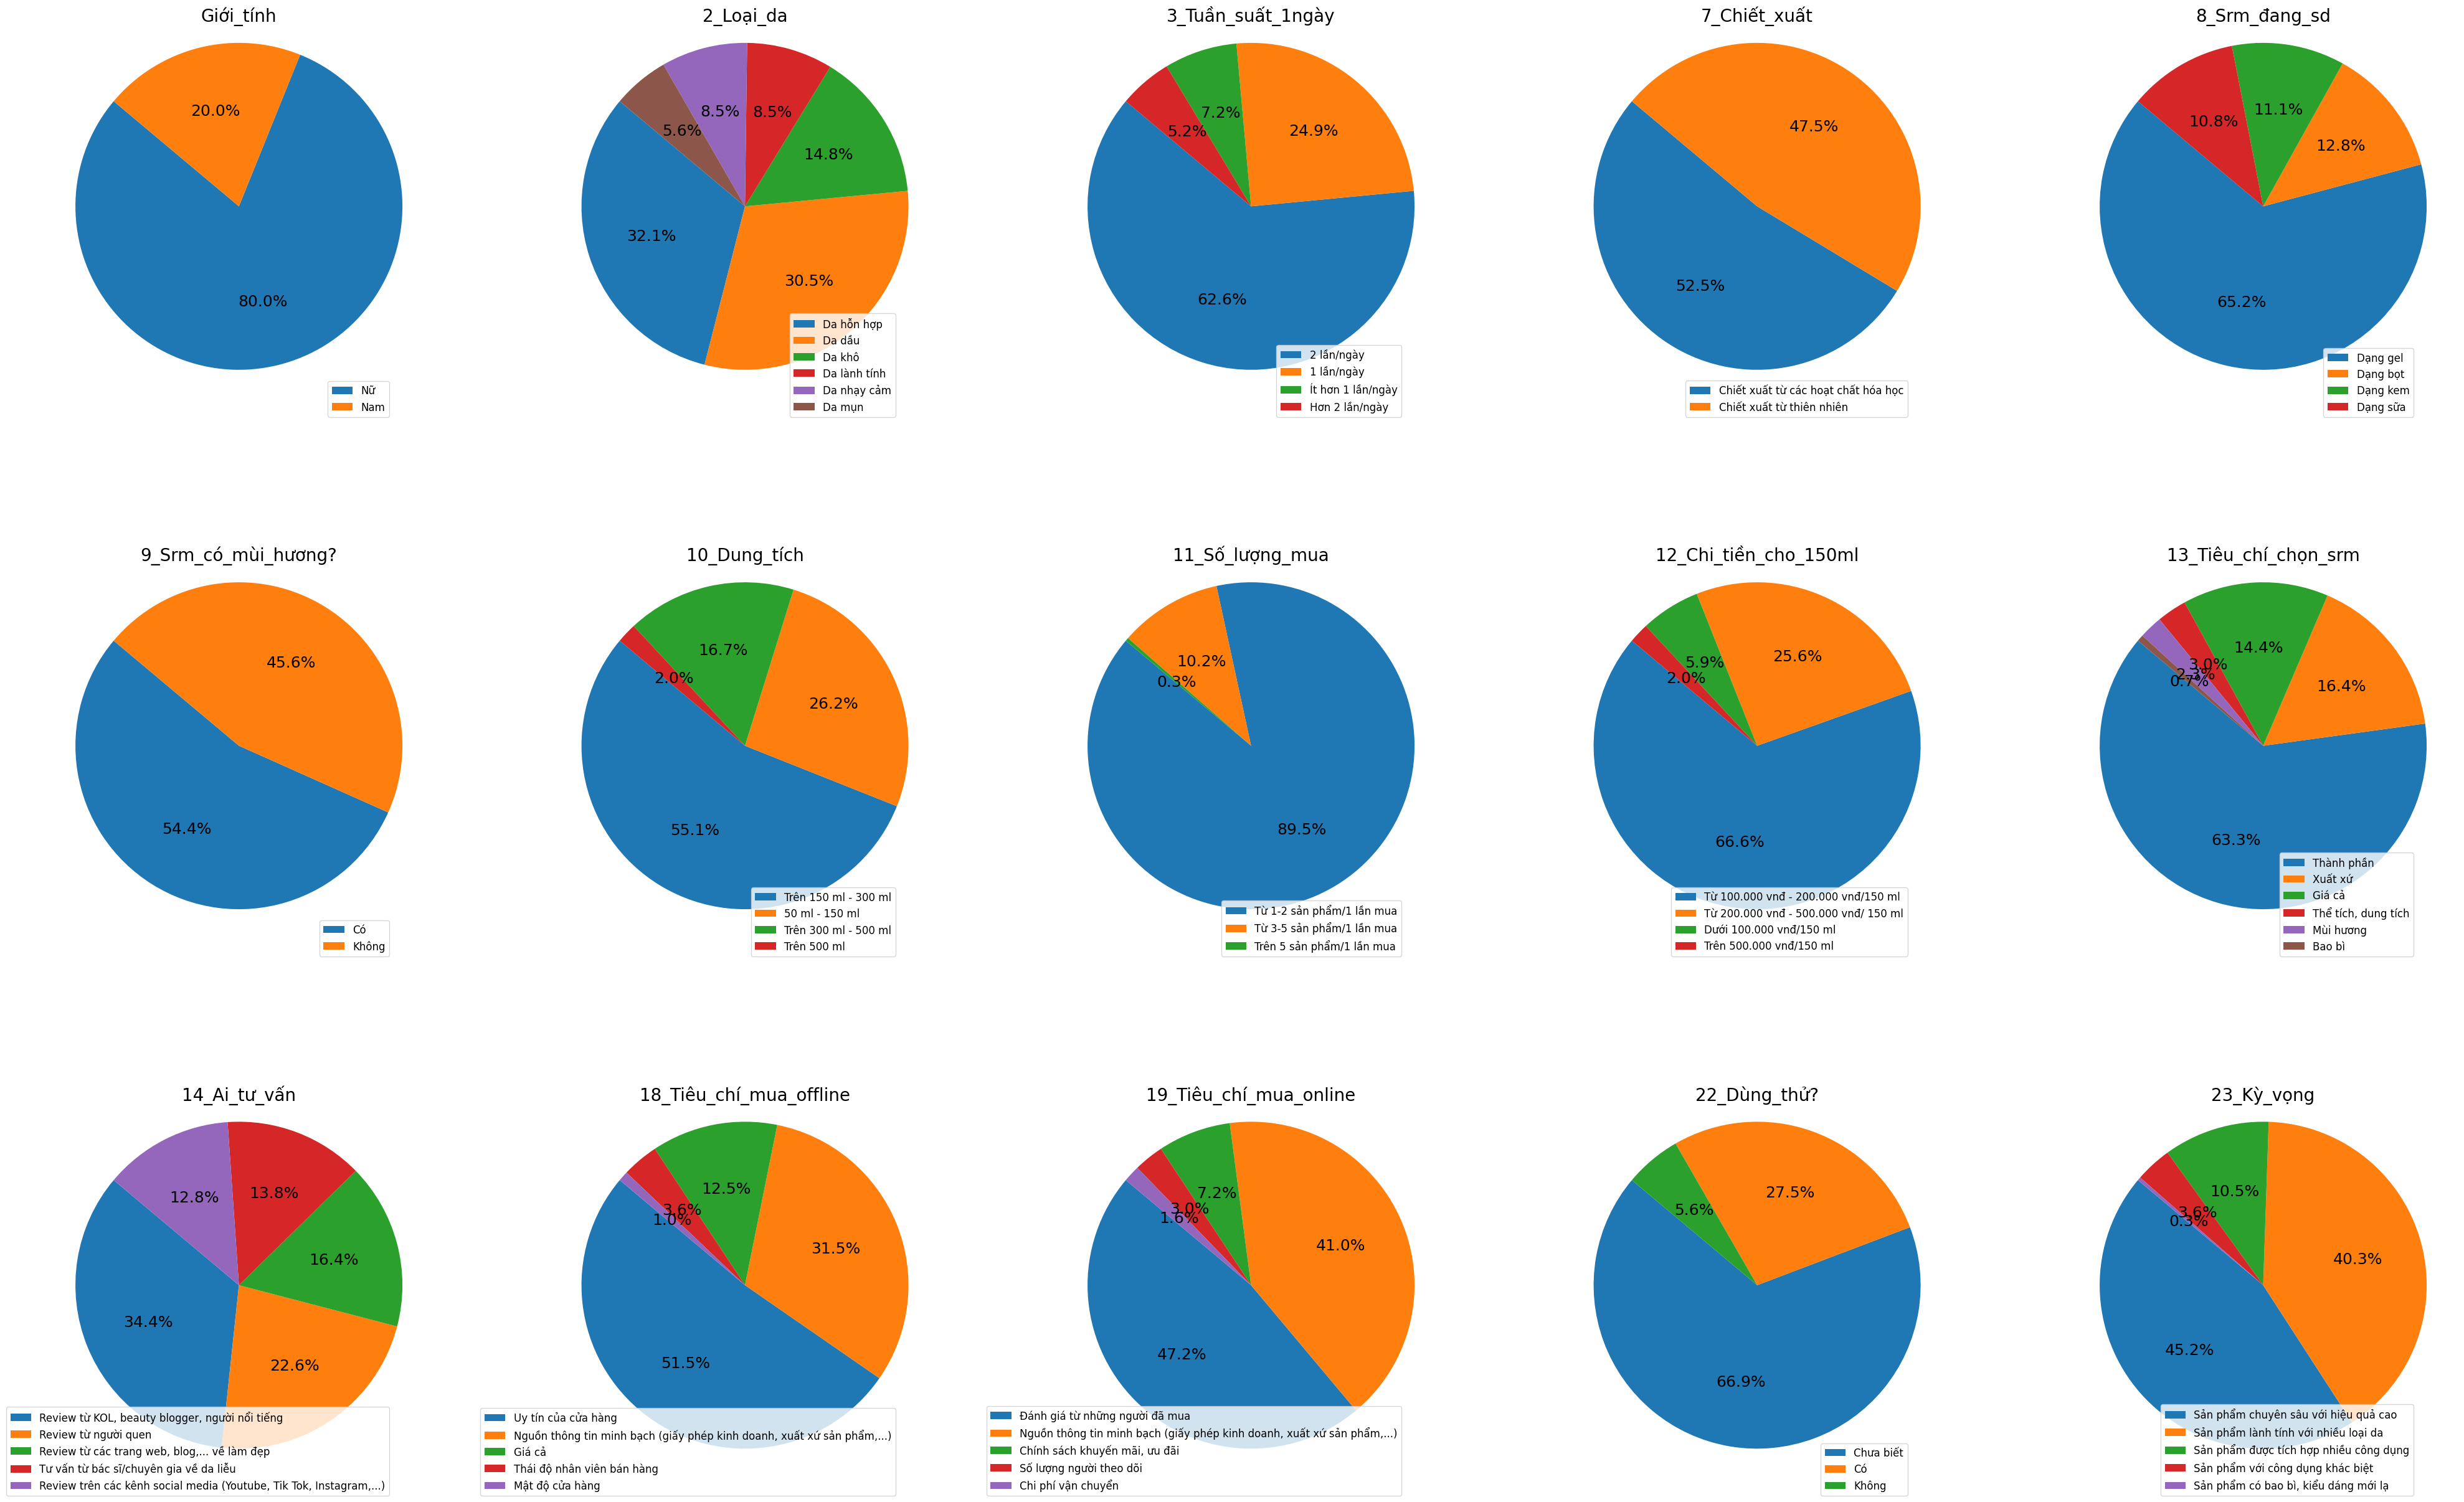

In [21]:
# TODO: code step 2
plt.figure(figsize=(50, 30))

for i, col in enumerate(single_answer_cols, 1):
    ax = plt.subplot(3, 5, i)  # Adjusting the layout to fit all pie charts
    dist_dict = single_cate_profile.at['distribution', col]
    patches, texts, autotexts = ax.pie(dist_dict.values(), autopct='%1.1f%%', startangle=140)
    plt.axis('equal') 
    plt.title(col,fontsize = 20)
    for text in autotexts:
        text.set_fontsize(18)

    ax.legend(patches, dist_dict.keys(), loc='lower right', bbox_to_anchor=(0.9, -0.1), ncol=1, fontsize='large')

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

- Look at the above charts, you can gain some information about the distribution of categorical columns with single answer. For example, you can easily point out that most of participants clean their face twice a day, buy the cleanser product according to the instructions of KOLs and beauty blogger,...
- This information will help you a lot in deciding what and how to buy a cleanser product.

- Next, we will compute the distribution of multiple answer columns. You also perform the following familiar steps:
    - Step #1: For each column, you have to compute the **number of different attributes** and a **dictionary** whose keys and values are attributes and number of each attribute, corresponding. Save your result to a dataframe called `multiple_cate_profile`. Note that in columns `'91_*', '92_*', '93_*'`, there are user-defined values, which are recorded from `Mục khác`. You have to replace these values with `Khác` (you can use `apply` for replacing). For example, column `91_Thích_hương_trái_cây?` has 8 original values (see `./form.pdf`). The rest values will be replace with `Khác`.
    - Step #2: Visualize the 5 values with the highest frequency of occurrence using bar chart. You can use `for` loop to draw the charts.

- Note that do not touch the `df` since it will be used to check your answer.

In [22]:
multi_answer_cols = ['1_Mục_đích_sd_srm','4_Sd_khi_nào','5_Mua_ở_đâu','6_Quảng_cáo_ở_đâu','91_Thích_hương_trái_cây?','92_Thích_hương_rau_củ?','93_Thích_hương_hoa_cỏ?','15_Xuất_xứ','16_Mua_online_ở_đâu','17_Mua_offline_ở_đâu','20_Lo_ngại_về_srm']
df = survey_df[multi_answer_cols]

# TODO: code step 1

def clean_string(s):
    # Keep alphabetic characters, spaces, and semicolons
    return re.sub(r'[^A-Za-zÀ-ỹ\s;]', '', s).strip()

predefined_values = {
    '91_Thích_hương_trái_cây?': ['Dâu', 'Táo', 'Mâm xôi', 'Cherry', 'Việt quất', 'Đào', 'Cam', 'Chanh'],
    '92_Thích_hương_rau_củ?': ['Dưa leo' , 'Thảo mộc', 'Nha đam', 'Rau má', 'Cà chua', 'Cần tây'],
    '93_Thích_hương_hoa_cỏ?': ['Lavender', 'Hoa hồng', 'Anh đào', 'Trà xanh',  'Hoa sứ', 'Hoa cúc']
}
def process_column_with_predefined(df, column, predefined_list=None):
    # Apply clean_string function to each element in the column
    cleaned_df = df[column].dropna().apply(lambda x: [clean_string(choice) for choice in str(x).split(',')])
    if predefined_list:
        # Replace values based on predefined list and filter out empty strings
        replaced_values = cleaned_df.apply(lambda x: [choice if choice in predefined_list and choice != '' else 'Khác' for choice in x if choice != '']).explode()
    else:
        # Filter out empty strings
        replaced_values = cleaned_df.apply(lambda x: [choice for choice in x if choice != '']).explode()
    return len(replaced_values.unique()), replaced_values.value_counts().to_dict()

multiple_cate_profile = pd.DataFrame(index=["num_diff_vals", "distribution"], columns=multi_answer_cols)

for col in multi_answer_cols:
    predefined_list = predefined_values.get(col, None)
    num_unique, distribution = process_column_with_predefined(df, col, predefined_list)
    multiple_cate_profile.at["num_diff_vals", col] = num_unique
    multiple_cate_profile.at["distribution", col] = distribution

multiple_cate_profile

,1_Mục_đích_sd_srm,4_Sd_khi_nào,5_Mua_ở_đâu,6_Quảng_cáo_ở_đâu,91_Thích_hương_trái_cây?,92_Thích_hương_rau_củ?,93_Thích_hương_hoa_cỏ?,15_Xuất_xứ,16_Mua_online_ở_đâu,17_Mua_offline_ở_đâu,20_Lo_ngại_về_srm
num_diff_vals,7,5,9,8,9,7,7,11,3,6,4
distribution,{'Loại bỏ bụi bẩn; dầu thừa; tế bào chết;': 27...,"{'Trước khi đi ngủ': 242, 'Sau khi thức dậy': ...","{'Các sàn thương mại điện tử': 213, 'Các cửa h...","{'Truyền thông; quảng cáo': 205, 'Tự tìm hiểu'...","{'Đào': 61, 'Táo': 44, 'Cam': 39, 'Cherry': 36...","{'Nha đam': 114, 'Thảo mộc': 72, 'Rau má': 47,...","{'Trà xanh': 92, 'Hoa hồng': 71, 'Lavender': 6...","{'Hàn Quốc': 184, 'Nhật Bản': 111, 'Mỹ': 100, ...","{'Sàn thương mại điện tử': 253, 'Website của h...","{'Các cửa hàng mỹ phẩm': 198, 'Cửa hàng chính ...","{'Hàng giả; hàng nhái': 216, 'Tác dụng phụ; gâ..."


In [23]:
# TEST
assert list(multiple_cate_profile.to_numpy()[0]) == [7, 5, 9, 8, 9, 7, 7, 11, 3, 6, 4]
assert dict(multiple_cate_profile['20_Lo_ngại_về_srm']) == {'num_diff_vals': 4, 'distribution': {'Hàng giả; hàng nhái': 216, 'Tác dụng phụ; gây kích ứng; bong tróc da': 141, 'Sản phẩm không có nguồn gốc rõ ràng': 104, 'Không có hiệu quả hoặc hiệu quả kém': 44}}
assert dict(multiple_cate_profile['91_Thích_hương_trái_cây?']) == {'num_diff_vals': 9, 'distribution': {'Đào': 61, 'Táo': 44, 'Cam': 39, 'Cherry': 36, 'Chanh': 34, 'Dâu': 34, 'Việt quất': 33, 'Khác': 13, 'Mâm xôi': 11}}
assert dict(multiple_cate_profile['92_Thích_hương_rau_củ?']) == {'num_diff_vals': 7, 'distribution': {'Nha đam': 114, 'Thảo mộc': 72, 'Rau má': 47, 'Dưa leo': 35, 'Cà chua': 20, 'Cần tây': 5, 'Khác': 4}}
assert dict(multiple_cate_profile['93_Thích_hương_hoa_cỏ?']) == {'num_diff_vals': 7, 'distribution': {'Trà xanh': 92, 'Hoa hồng': 71, 'Lavender': 68, 'Anh đào': 49, 'Hoa cúc': 20, 'Hoa sứ': 7, 'Khác': 3}}

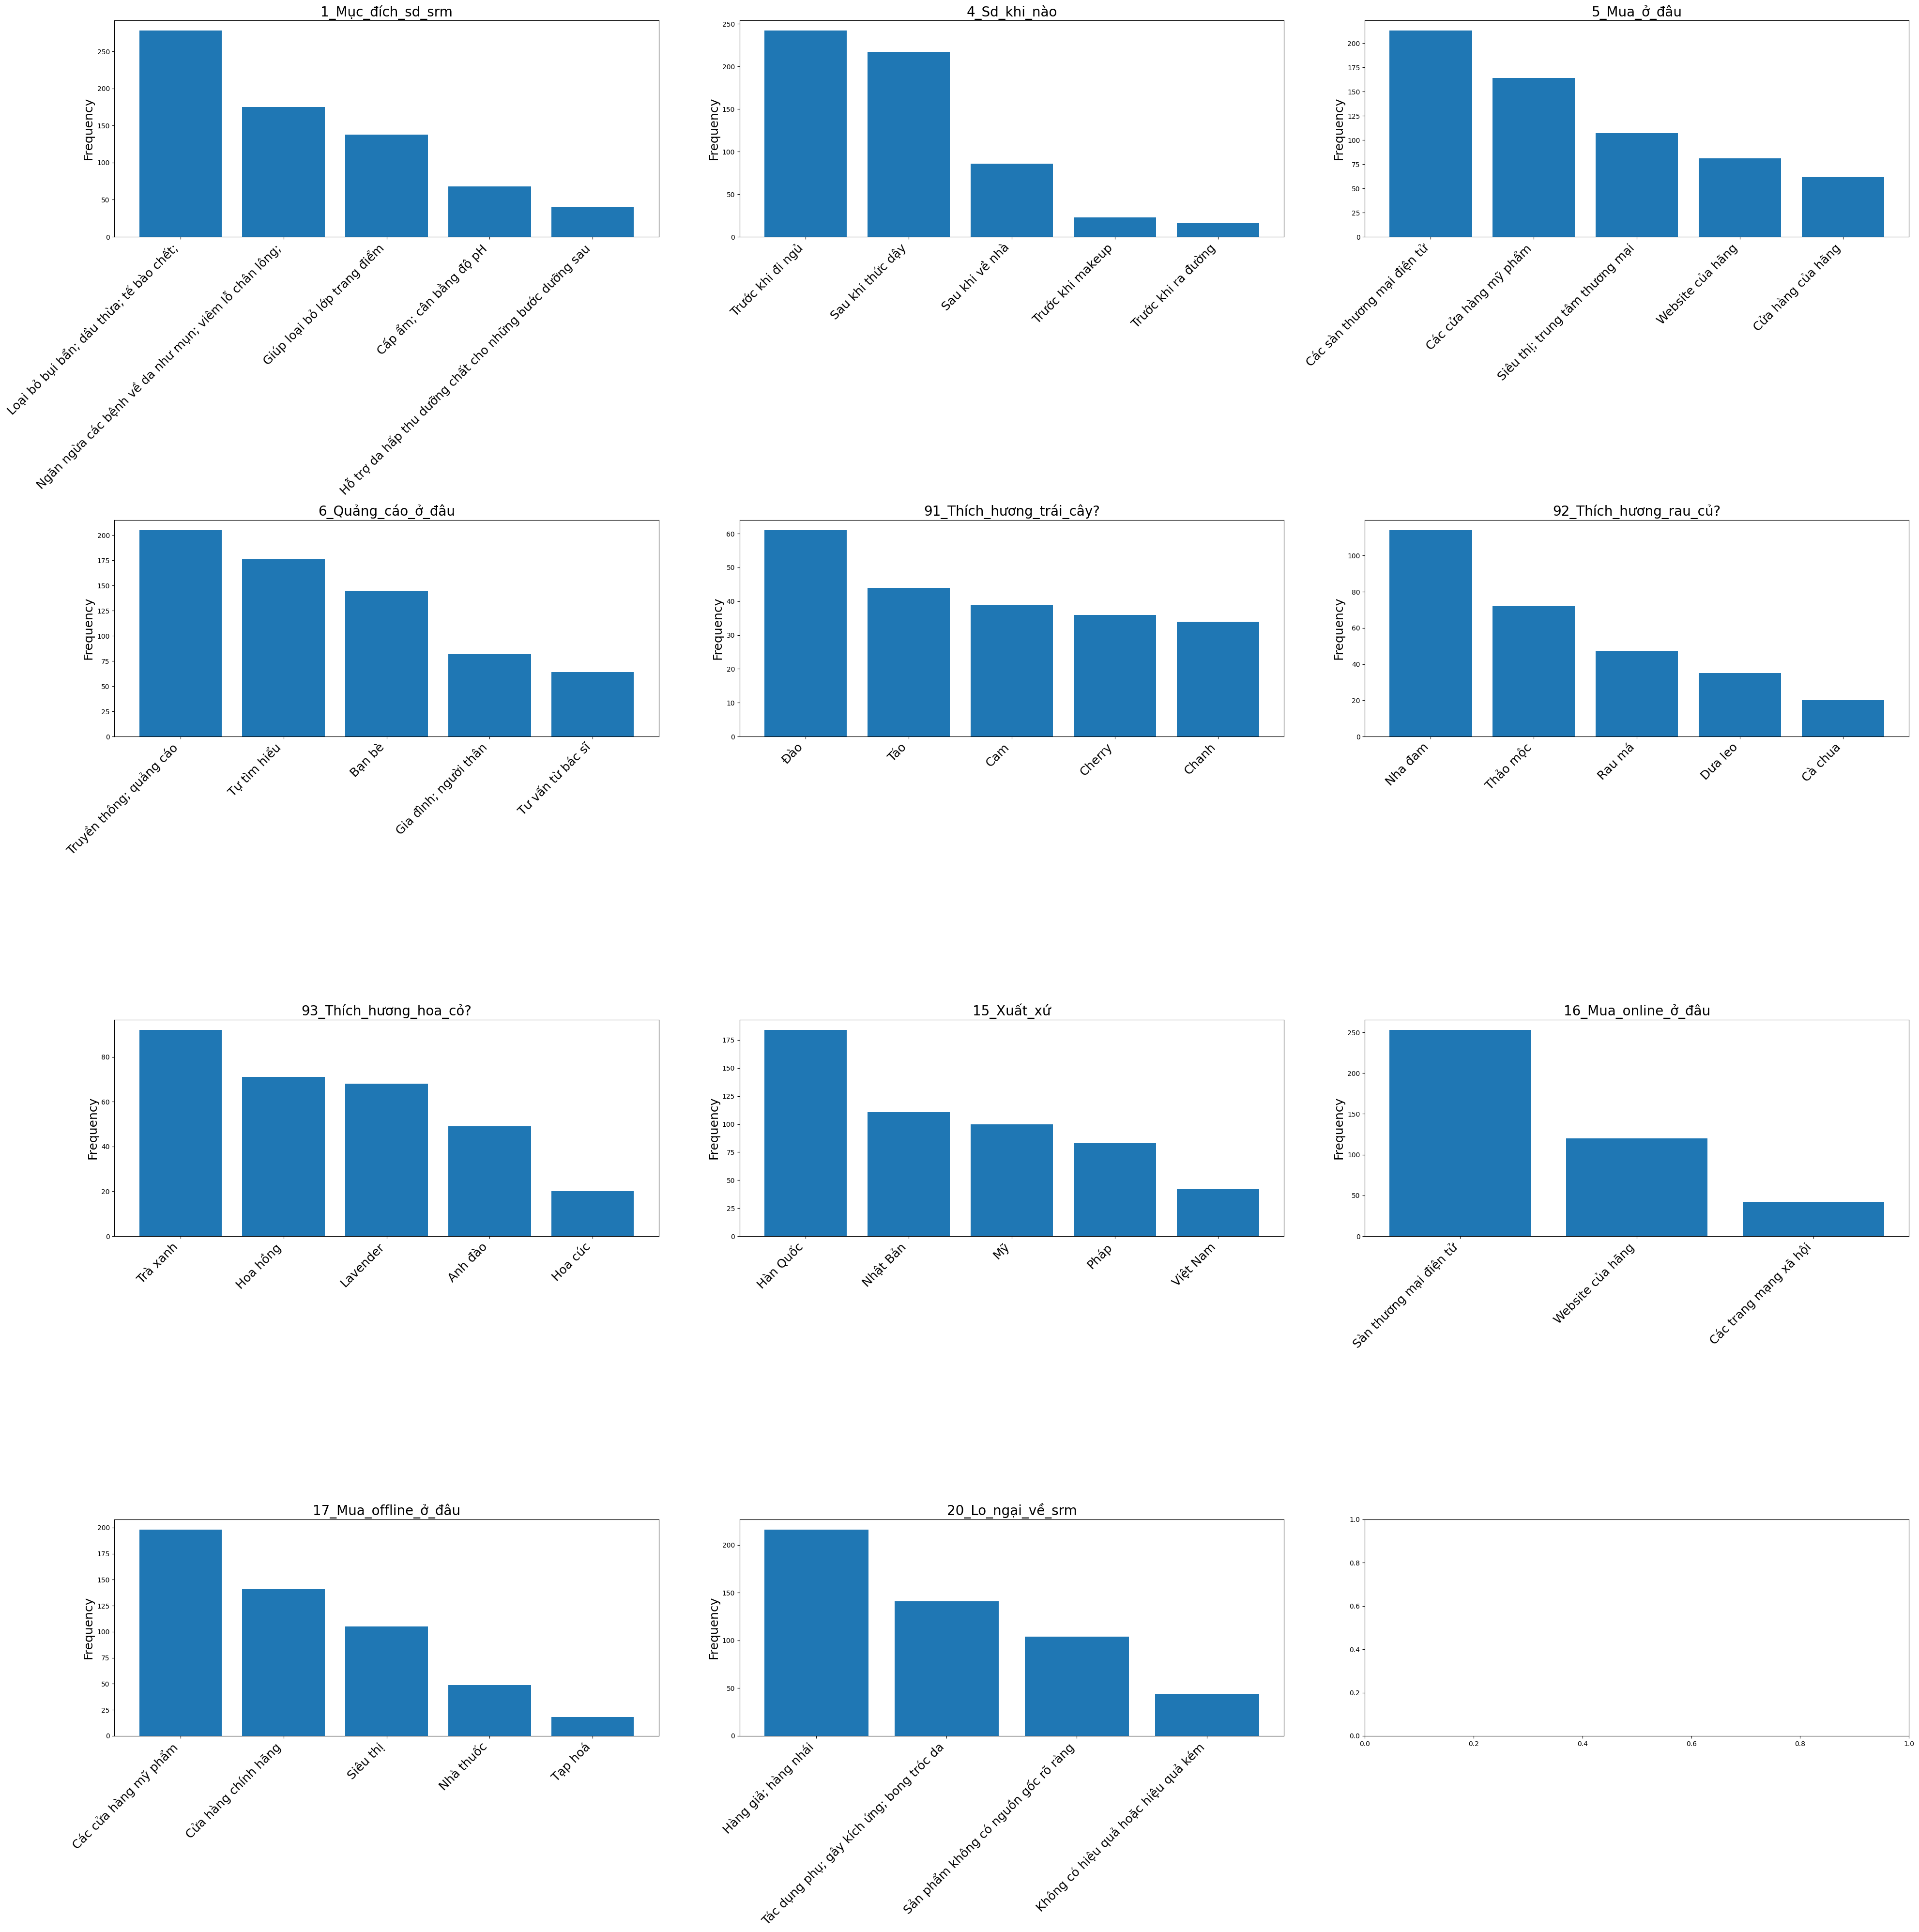

In [24]:
# TODO: code step 2
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(40, 40))  
axs = axs.flatten()  

for idx, col in enumerate(multi_answer_cols):
    # Get the top 5 most common responses and their counts
    top_items = multiple_cate_profile.loc['distribution', col].items()
    top_items = sorted(top_items, key=lambda x: x[1], reverse=True)[:5]
    responses, counts = zip(*top_items)

    axs[idx].bar(responses, counts)
    axs[idx].set_title(col, fontsize=20)  
    axs[idx].set_xticklabels(responses, rotation=45, ha='right', fontsize=18)  
    axs[idx].set_ylabel('Frequency', fontsize=18)  

plt.tight_layout()
plt.show()

- Finally, you will perform **one-hot encoding** on categorical columns. One-hot encoding is a popular pre-processing method for categorical data. What is one-hot encoding? What does it use for?

    **TODO**: 
    - One hot encoding is a process used to convert categorical data variables into a form that could be provided to machine learning algorithms to do a better job in prediction. Categorical data are variables that contain label values rather than numeric values. The number of possible values is often limited to a fixed set, for example, users by country, where the users can be from one of the countries in the dataset.
    - Many machine learning algorithms cannot work with categorical data directly. They require all input variables and output variables to be numeric. This is where one hot encoding comes into play, where each unique category value is assigned a binary vector that has all zero values except the index of the category, which is marked with a 1.

- Since performing one-hot encoding on single answer columns is quite easy, you will perform this technique on multiple answer columns. In this part, you can use `for` loop to loop through the column and pre-process them. However, it would be better if you don't use loop for this task. The final dataframe is save to `one_hot_df`

- Note that do not touch the `df` since it will be used to check your answer.

In [25]:
# TODO: perform one-hot encoding on multiple_answer_cols

one_hot_df = pd.DataFrame(index=survey_df.index)

for col in multi_answer_cols:
    unique_values = multiple_cate_profile.at['distribution', col].keys()
    mlb = MultiLabelBinarizer(classes=list(unique_values))

    cleaned_data = df[col].apply(lambda x: [clean_string(choice) for choice in str(x).split(',')])
    
    predefined_list = predefined_values.get(col, None)
    if predefined_list:
        cleaned_data = cleaned_data.apply(lambda x: [choice if choice in predefined_list else 'Khác' for choice in x])

    one_hot_encoded_data = mlb.fit_transform(cleaned_data)
    
    column_one_hot = pd.DataFrame(one_hot_encoded_data, columns=mlb.classes_, index=df[col].index)
    column_one_hot = column_one_hot.add_prefix(f"{col}_")

    one_hot_df = one_hot_df.merge(column_one_hot, left_index=True, right_index=True, how='left')

one_hot_df.fillna(0, inplace=True)

one_hot_df

,1_Mục_đích_sd_srm_Loại bỏ bụi bẩn; dầu thừa; tế bào chết;,1_Mục_đích_sd_srm_Ngăn ngừa các bệnh về da như mụn; viêm lỗ chân lông;,1_Mục_đích_sd_srm_Giúp loại bỏ lớp trang điểm,1_Mục_đích_sd_srm_Cấp ẩm; cân bằng độ pH,1_Mục_đích_sd_srm_Hỗ trợ da hấp thu dưỡng chất cho những bước dưỡng sau,1_Mục_đích_sd_srm_Hỗ trợ làm trắng da,1_Mục_đích_sd_srm_Hỗ trợ da căng bóng,4_Sd_khi_nào_Trước khi đi ngủ,4_Sd_khi_nào_Sau khi thức dậy,4_Sd_khi_nào_Sau khi về nhà,...,17_Mua_offline_ở_đâu_Các cửa hàng mỹ phẩm,17_Mua_offline_ở_đâu_Cửa hàng chính hãng,17_Mua_offline_ở_đâu_Siêu thị,17_Mua_offline_ở_đâu_Nhà thuốc,17_Mua_offline_ở_đâu_Tạp hoá,17_Mua_offline_ở_đâu_Cửa hàng tiện lợi,20_Lo_ngại_về_srm_Hàng giả; hàng nhái,20_Lo_ngại_về_srm_Tác dụng phụ; gây kích ứng; bong tróc da,20_Lo_ngại_về_srm_Sản phẩm không có nguồn gốc rõ ràng,20_Lo_ngại_về_srm_Không có hiệu quả hoặc hiệu quả kém
0,1,1,1,0,0,0,0,1,0,0,...,0,1,1,0,0,0,1,0,1,0
1,1,0,1,0,0,1,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
2,1,1,1,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,0,1,1,0,...,1,1,0,0,0,0,1,0,1,0
4,1,1,0,1,0,0,0,1,1,0,...,1,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
331,1,1,0,0,0,0,0,1,1,0,...,1,0,1,0,0,0,1,0,0,0
332,0,1,0,1,0,0,1,1,0,1,...,1,1,1,1,1,1,1,0,1,0
334,1,0,0,1,0,1,0,1,0,0,...,1,1,0,0,0,0,1,0,1,0


In [26]:
# TEST
for i in range(len(df)):
    if i != 7 and i != 168:
        assert sum(one_hot_df.iloc[i]) == sum([len(item.split(', ')) if item is not np.nan else 0 for item in df.iloc[i]])

AssertionError: 

- What does the test mean? In the test, why don't I test the row #7 and #168?

    **TODO** (OPTIONAL): There could be special conditions in these rows that make them unsuitable for this test. For example, these rows contain data anomalies, such as unusual category counts, or they might be outliers in some way.

## 4. Question proposing & Answering

- In this section, you are going to answer my 2 questions and prose 1 question. Note that these questions can all be answered by analyzing data. Theoretically, the proposed question have to benefit at a certain level. But this is exercise about `Pandas`, my questions can be aimed more at technical side than the meaningful side. But your question has to be meaningful :v

### 4.0. What is the difference in scent preference when choosing a facial cleanser between male and female participants?

- In order to answer this question, You have to compare the choice of scent between male and female participants. Group bar chart might be a good option to do so.
- First, you have to filter needed columns (`'91_*', '92_*', '93_*'`) from `one_hot_df` and place them in a new dataframe call `scent_df`. You can use `for` loop to get the column names if needed.
- Then, group by `Giới_tính` to find out the distribution of scent for each gender. Save the result to `distribution_91, distribution_92, distribution_93`. You can observe the `distribution_91` in the cell code below.
- Visualize the result in a group bar chart. Groups are scents. In each group, there will be 2 columns (`Nam` and `Nữ`)

In [27]:
# TODO: answer the question
scent_columns = [col for col in one_hot_df.columns if col.startswith('91_') or col.startswith('92_') or col.startswith('93_')]
scent_df = one_hot_df[scent_columns]

scent_df = scent_df.join(survey_df['Giới_tính']).dropna()

distribution_91 = scent_df[scent_df.columns[scent_df.columns.str.startswith('91_')]].groupby(scent_df['Giới_tính']).sum()
distribution_92 = scent_df[scent_df.columns[scent_df.columns.str.startswith('92_')]].groupby(scent_df['Giới_tính']).sum()
distribution_93 = scent_df[scent_df.columns[scent_df.columns.str.startswith('93_')]].groupby(scent_df['Giới_tính']).sum()

distribution_91

,91_Thích_hương_trái_cây?_Đào,91_Thích_hương_trái_cây?_Táo,91_Thích_hương_trái_cây?_Cam,91_Thích_hương_trái_cây?_Cherry,91_Thích_hương_trái_cây?_Chanh,91_Thích_hương_trái_cây?_Dâu,91_Thích_hương_trái_cây?_Việt quất,91_Thích_hương_trái_cây?_Khác,91_Thích_hương_trái_cây?_Mâm xôi
Giới_tính,,,,,,,,,
Nam,12,11,9,8,10,6,12,25,2
Nữ,49,33,30,28,24,28,21,125,9


In [28]:
# TEST
assert dict(distribution_91['91_Thích_hương_trái_cây?_Việt quất']) == {'Nam': 12, 'Nữ': 21}
assert dict(distribution_92['92_Thích_hương_rau_củ?_Cần tây']) == {'Nam': 2, 'Nữ': 3}
assert dict(distribution_93['93_Thích_hương_hoa_cỏ?_Anh đào']) == {'Nam': 7, 'Nữ': 42}

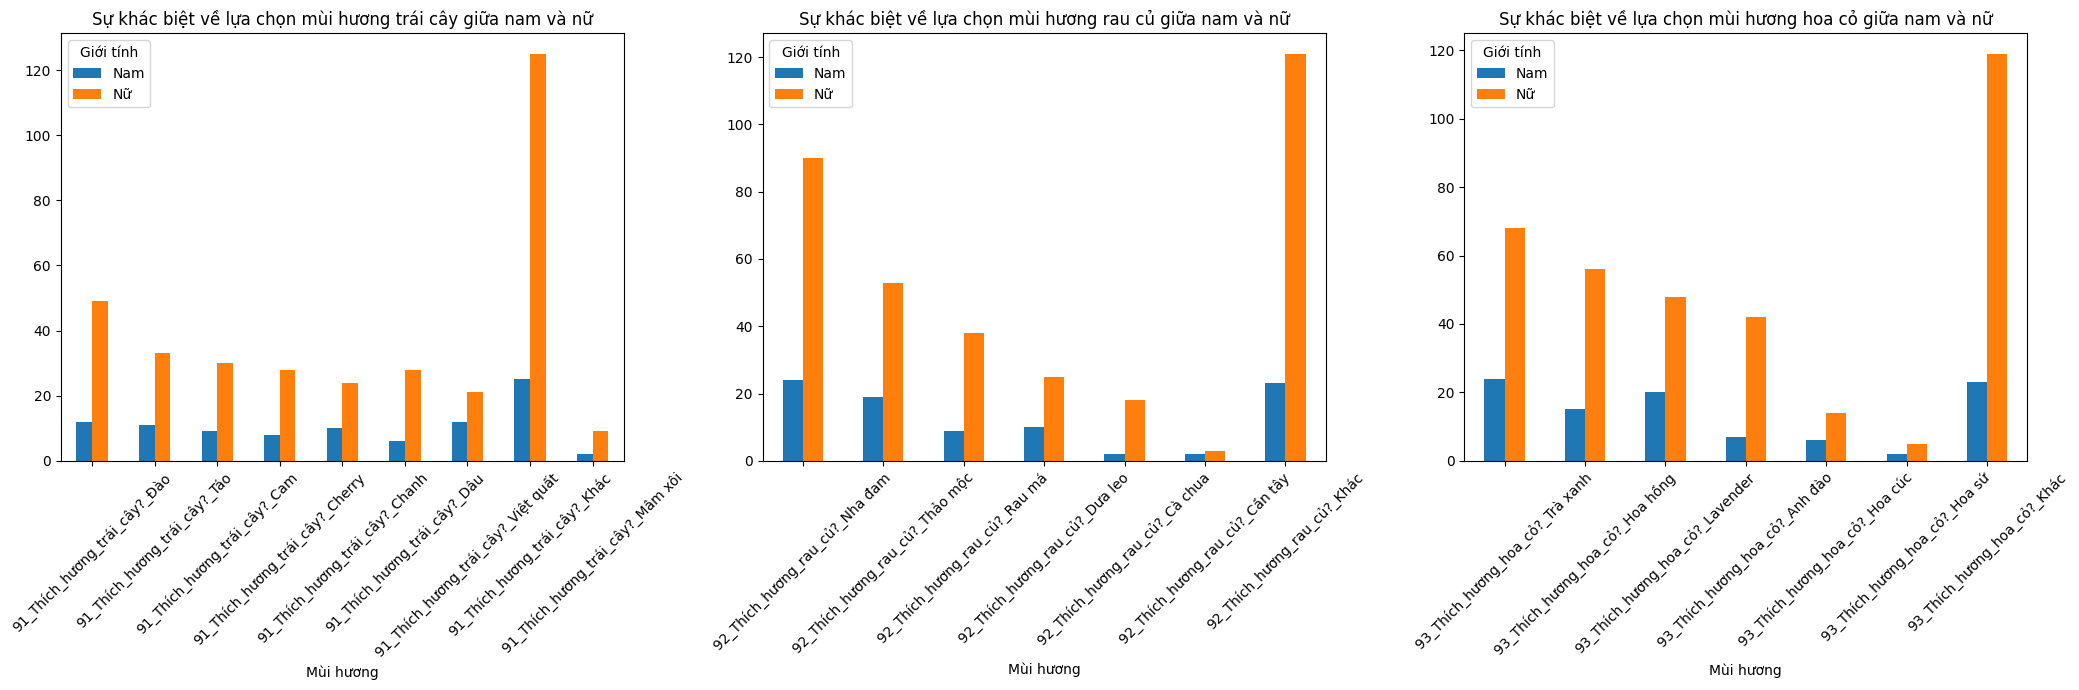

In [29]:
# TODO: Visualize 3 distribution. Your figure will look like the chart below

df_91 = pd.DataFrame(distribution_91).T
df_92 = pd.DataFrame(distribution_92).T
df_93 = pd.DataFrame(distribution_93).T

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 7))

# Plot distribution_91
df_91.plot(kind='bar', ax=axes[0])
axes[0].set_title("Sự khác biệt về lựa chọn mùi hương trái cây giữa nam và nữ")
axes[0].set_xlabel("Mùi hương")
axes[0].legend(title='Giới tính')
axes[0].tick_params(axis='x', rotation=45) 

# Plot distribution_92
df_92.plot(kind='bar', ax=axes[1])
axes[1].set_title("Sự khác biệt về lựa chọn mùi hương rau củ giữa nam và nữ")
axes[1].set_xlabel("Mùi hương")
axes[1].legend(title='Giới tính')
axes[1].tick_params(axis='x', rotation=45)  

# Plot distribution_93
df_93.plot(kind='bar', ax=axes[2])
axes[2].set_title("Sự khác biệt về lựa chọn mùi hương hoa cỏ giữa nam và nữ")
axes[2].set_xlabel("Mùi hương")
axes[2].legend(title='Giới tính')
axes[2].tick_params(axis='x', rotation=45) 

plt.tight_layout()
plt.show()


### 4.1. What is the most important factor when choosing a facial cleanser between male and female participants?

- Hint: See the question #22 in `./form.pdf`.
- This question can be answered in the same way as question 1 but it is much easier because the data is single answer data.
    - Save the distribution of male and female participants to 2 dictionaries named `male_factors` and `female_factors`
    - Then visualize the result as question 1

In [30]:
# TODO: answer the question
factors_column = '13_Tiêu_chí_chọn_srm'
gender_column = 'Giới_tính'

# Split the dataframe into two based on gender
male_factors_df = survey_df[survey_df[gender_column] == 'Nam'][factors_column]
female_factors_df = survey_df[survey_df[gender_column] == 'Nữ'][factors_column]

male_factors = male_factors_df.value_counts().to_dict()
female_factors = female_factors_df.value_counts().to_dict()
male_factors_df = pd.DataFrame(list(male_factors.items()), columns=['Yếu tố', 'Số lượng'])
female_factors_df = pd.DataFrame(list(female_factors.items()), columns=['Yếu tố', 'Số lượng'])

male_factors_df, female_factors_df

(                Yếu tố  Số lượng
 0           Thành phần        32
 1              Xuất xứ        14
 2               Giá cả        10
 3            Mùi hương         2
 4  Thể tích, dung tích         2
 5               Bao bì         1,
                 Yếu tố  Số lượng
 0           Thành phần       161
 1              Xuất xứ        36
 2               Giá cả        34
 3  Thể tích, dung tích         7
 4            Mùi hương         5
 5               Bao bì         1)

In [31]:
# TEST
assert male_factors == {'Thành phần': 32, 'Xuất xứ': 14, 'Giá cả': 10, 'Mùi hương': 2, 'Thể tích, dung tích': 2, 'Bao bì': 1}
assert female_factors == {'Thành phần': 161, 'Xuất xứ': 36, 'Giá cả': 34, 'Thể tích, dung tích': 7, 'Mùi hương': 5, 'Bao bì': 1}

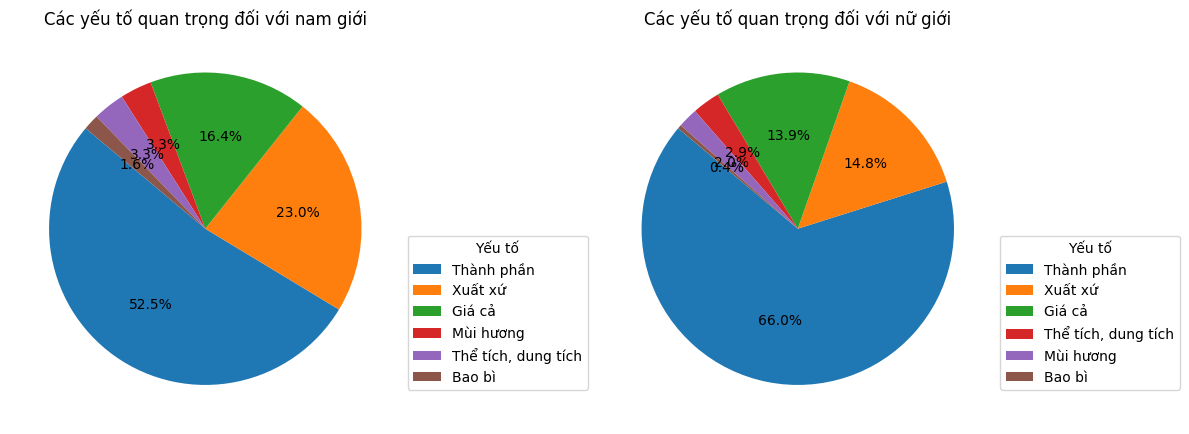

In [32]:
# TODO: Visualize
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(male_factors.values(), autopct='%1.1f%%', startangle=140)
plt.title('Các yếu tố quan trọng đối với nam giới')
plt.legend(male_factors.keys(), title="Yếu tố", loc="upper left", bbox_to_anchor=(1, 0.5))

plt.subplot(1, 2, 2)
plt.pie(female_factors.values(), autopct='%1.1f%%', startangle=140)
plt.title('Các yếu tố quan trọng đối với nữ giới')
plt.legend(female_factors.keys(), title="Yếu tố", loc="upper left", bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

### 4.2. Your question goes here

- Do not use the same motif (compare male and female) for your proposed question.
- What are the purposes of answering your questions?
- Answer your question then visualize if needed.

### Question: What is the distribution of facial cleanser usage frequency across different facial skin types?

- The purposes of answering your question: 
    + It helps in understanding the patterns and preferences of consumers with different skin types. This insight is crucial for companies that produce and market facial cleansers, enabling them to tailor their products and marketing strategies to meet the specific needs of each segment.
    + For individuals, knowing how often people with similar skin types use facial cleansers can guide them in establishing their own skincare routines. Personalized skincare is becoming increasingly popular, and this kind of data helps in making more informed decisions about product usage.
    + From a dermatological perspective, this information can be valuable in studying the impact of cleansing frequency on various skin types. It might contribute to a better understanding of skin health and the prevention or management of skin conditions.

In [33]:
# TODO: answer your question here
frequency_of_use = '3_Tuần_suất_1ngày'
facial_skin_type = '2_Loại_da'

skin_type_distribution_percentage = survey_df.groupby(facial_skin_type)[frequency_of_use].value_counts(normalize=True).unstack().fillna(0)

skin_type_usage_frequency = survey_df.groupby([facial_skin_type, frequency_of_use]).size().unstack().fillna(0)

print(skin_type_distribution_percentage)
print(skin_type_usage_frequency)

3_Tuần_suất_1ngày  1 lần/ngày  2 lần/ngày  Hơn 2 lần/ngày  Ít hơn 1 lần/ngày
2_Loại_da                                                                   
Da dầu               0.204301    0.698925        0.053763           0.043011
Da hỗn hợp           0.234694    0.683673        0.051020           0.030612
Da khô               0.311111    0.511111        0.044444           0.133333
Da lành tính         0.346154    0.461538        0.038462           0.153846
Da mụn               0.235294    0.529412        0.117647           0.117647
Da nhạy cảm          0.269231    0.576923        0.038462           0.115385
3_Tuần_suất_1ngày  1 lần/ngày  2 lần/ngày  Hơn 2 lần/ngày  Ít hơn 1 lần/ngày
2_Loại_da                                                                   
Da dầu                     19          65               5                  4
Da hỗn hợp                 23          67               5                  3
Da khô                     14          23               2                  6

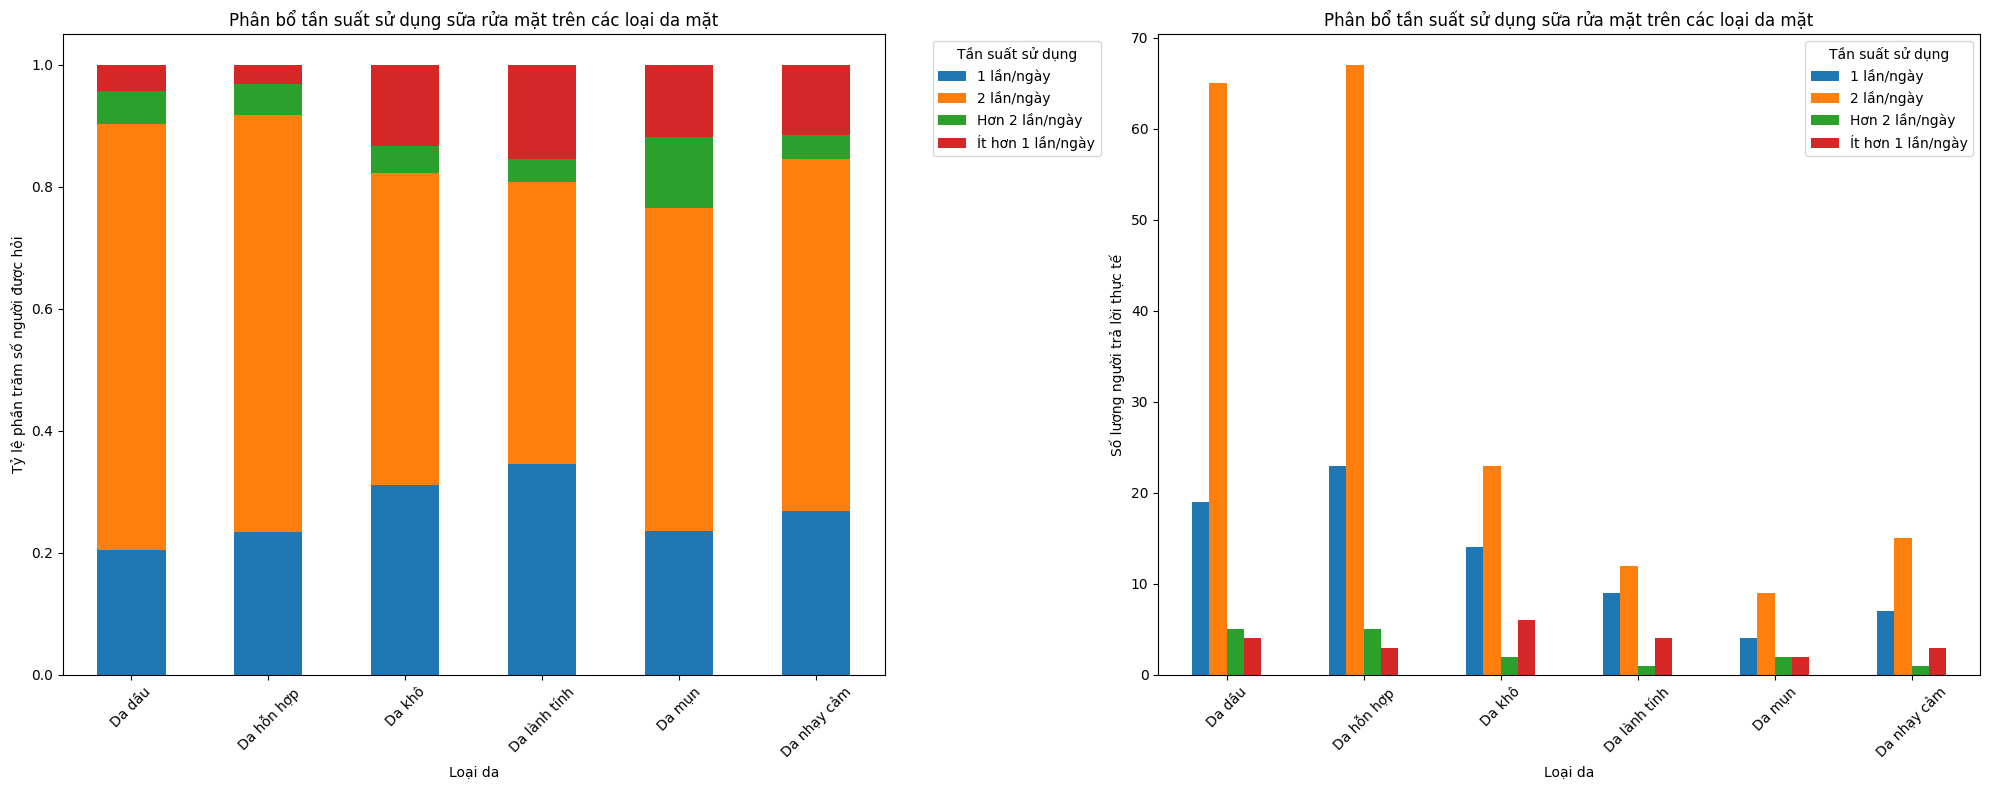

In [34]:
# TODO (OPTIONAL): visualize
# Visualizing the distribution using a stacked bar chart

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

skin_type_distribution_percentage.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title("Phân bổ tần suất sử dụng sữa rửa mặt trên các loại da mặt")
axes[0].set_xlabel("Loại da")
axes[0].set_ylabel("Tỷ lệ phần trăm số người được hỏi")
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title="Tần suất sử dụng", bbox_to_anchor=(1.05, 1), loc='upper left')

skin_type_usage_frequency.plot(kind='bar', ax=axes[1])
axes[1].set_title('Phân bổ tần suất sử dụng sữa rửa mặt trên các loại da mặt')
axes[1].set_xlabel('Loại da')
axes[1].set_ylabel('Số lượng người trả lời thực tế')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Tần suất sử dụng')

plt.tight_layout()
plt.show()